In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
sys.path.append('../')
sys.path.append('./adv-ml/')
import numpy as np
SEED = 42



from ipywidgets import interact
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

SEED = 42
np.random.seed(SEED)

from attack_utils import *

cifar_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
mnist_class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
#n_samples = 100

# image = np.genfromtxt('x_test_opyt.csv', delimiter=',')
# image1 = image.reshape((n_samples, 28,28,1))
# show_digit(image1[0],1, model_logit.predict((image1[0].reshape((1,28,28,1)))))


In [3]:
n_samples = 10
images = np.genfromtxt('../x_test_random_mnist.csv', delimiter=',')
orig_images = images.reshape((n_samples, 28,28,1))
orig_labels = np.genfromtxt('../y_test_random_mnist.csv', delimiter=',')

images = np.genfromtxt('../x_test_opyt_mnist.csv', delimiter=',')
adv_images = images.reshape((n_samples, 28,28,1))
adv_labels = np.genfromtxt('../y_pred_opyt_mnist.csv', delimiter=',')

#np.savetxt('y_pred_opyt.csv', model_logit.predict(adv_images), delimiter=',')

In [ ]:
browse_mis_samples(orig_images, adv_images,orig_labels, adv_labels, class_name=mnist_class_names)

In [ ]:
n_samples = 10
dim = (n_samples,32,32,3)
images = np.genfromtxt('../x_test_random_cifar10.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../y_test_random_cifar10.csv', delimiter=',')

images = np.genfromtxt('../x_test_opyt_cifar10.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../y_pred_opyt_cifar10.csv', delimiter=',')

In [ ]:
i=5
show_image(orig_images[i], orig_labels[i])

In [ ]:
show_image(adv_images[i], adv_labels[i])

In [ ]:
browse_mis_samples(orig_images, adv_images,orig_labels, adv_labels, dim=(10,32,32,3), class_name=cifar_class_names)

In [48]:
n_samples = 10
dim = (n_samples,32,32,3)
images = np.genfromtxt('../soft/CLEAN_X.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../soft/CLEAN_Y.csv', delimiter=',')

images = np.genfromtxt('../soft/SIMBA_X.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../soft/SIMBA_Y.csv', delimiter=',')

In [51]:
browse_mis_samples(orig_images, adv_images,orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

CORRECTED Mis-classified Images: 1 out of Total: 10
Mis preds:  [0]
Mean L2 Dist.:  1.6733199460307637


interactive(children=(IntSlider(value=0, description='i', max=0), Output()), _dom_classes=('widget-interact',)…

In [50]:
images_opyt = np.genfromtxt('../soft/OPYT_X.csv', delimiter=',')
adv_images_opyt = images_opyt.reshape(dim)
adv_labels_opyt = np.genfromtxt('../soft/OPYT_Y.csv', delimiter=',')
browse_mis_samples(orig_images, adv_images_opyt,orig_labels, adv_labels_opyt, dim=(n_samples,32,32,3), class_name=cifar_class_names)


CORRECTED Mis-classified Images: 3 out of Total: 10
Mis preds:  [5 6 9]
Mean L2 Dist.:  1.4640003796700223


interactive(children=(IntSlider(value=0, description='i', max=2), Output()), _dom_classes=('widget-interact',)…

In [45]:
l_2_dist(orig_images[5],adv_images_opyt[5])

1.0216516624810597

In [52]:
get_all_dist(orig_images[5],adv_images_opyt[5])

{'L2': 1.0217, 'L-INF': 0.0485, 'WS': 0.0051, 'ssim': 0.9773, 'psnr': 34.6882}

In [68]:
#MODAOA
n_samples = 100
dim = (n_samples,32,32,3)
images = np.genfromtxt('../MODAOA_data/x_test_random_cifar10.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../MODAOA_data/y_test_random_cifar10.csv', delimiter=',')

images = np.genfromtxt('../MODAOA_data/x_test_opyt_cifar10.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../MODAOA_data/y_pred_opyt_cifar10.csv', delimiter=',')

In [69]:
browse_mis_samples(orig_images, adv_images, orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

CORRECTED Mis-classified Images: 39 out of Total: 100
Mis preds:  [ 5  6  9 10 12 20 28 29 31 32 35 38 39 42 46 47 50 51 52 55 61 63 64 67
 68 69 71 72 74 76 77 78 79 80 83 85 86 92 93]
Mean L2 Dist.:  1.9199784147135783


interactive(children=(IntSlider(value=0, description='i', max=38), Output()), _dom_classes=('widget-interact',…

In [62]:
## PSO
n_samples = 100
dim = (n_samples,32,32,3)
images = np.genfromtxt('../test-PSO/CLEAN_X.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../test-PSO/CLEAN_Y.csv', delimiter=',')

images = np.genfromtxt('../test-PSO/OPYT_X.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../test-PSO/OPYT_Y.csv', delimiter=',')

In [63]:
browse_mis_samples(orig_images, adv_images, orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

CORRECTED Mis-classified Images: 25 out of Total: 100
Mis preds:  [ 5  6  9 12 28 32 39 42 46 47 50 51 52 55 56 63 64 69 71 72 74 79 86 92
 93]
Mean L2 Dist.:  1.833874716542494


interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

In [5]:
## BOUNDARY
n_samples = 100
dim = (n_samples,32,32,3)
images = np.genfromtxt('../test_boundary/CLEAN_X.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../test_boundary/CLEAN_Y.csv', delimiter=',')

images = np.genfromtxt('../test_boundary/BOUNDARY_X.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../test_boundary/BOUNDARY_Y.csv', delimiter=',')

In [6]:
browse_mis_samples(orig_images, adv_images, orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

CORRECTED Mis-classified Images: 97 out of Total: 100
Mis preds:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]
Mean L2 Dist.:  0.31410712464424956


interactive(children=(IntSlider(value=0, description='i', max=96), Output()), _dom_classes=('widget-interact',…

In [105]:
#MODAOA - Expt
n_samples = 1
dim = (n_samples,32,32,3)
images = np.genfromtxt('../x_test_random_cifar10.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../y_test_random_cifar10.csv', delimiter=',')

images = np.genfromtxt('../x_test_opyt_cifar10.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../y_pred_opyt_cifar10.csv', delimiter=',')

In [106]:
browse_mis_samples(orig_images, adv_images, orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

y true len ..:  10
CORRECTED Mis-classified Images: 1 out of Total: 1
Mis preds:  [0]
Mean L2 Dist.:  1.9848604532098113


interactive(children=(IntSlider(value=0, description='i', max=0), Output()), _dom_classes=('widget-interact',)…

In [3]:
#CSO
n_samples = 10
dim = (n_samples,32,32,3)
images = np.genfromtxt('../test_opyt_cso/CLEAN_X.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../test_opyt_cso/CLEAN_Y.csv', delimiter=',')

images = np.genfromtxt('../test_opyt_cso/OPYT_X.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../test_opyt_cso/OPYT_Y.csv', delimiter=',')

In [4]:
browse_mis_samples(orig_images, adv_images, orig_labels, adv_labels, dim=(n_samples,32,32,3), class_name=cifar_class_names)

CORRECTED Mis-classified Images: 5 out of Total: 10
Mis preds:  [2 3 5 6 9]
Mean L2 Dist.:  1.8403858807406848


interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

In [491]:
#MODAOA with new Evall function
n_samples = 20
dim = (n_samples,32,32,3)
images = np.genfromtxt('../target_opyt/CLEAN_X.csv', delimiter=',')
orig_images = images.reshape(dim)
orig_labels = np.genfromtxt('../target_opyt/CLEAN_Y.csv', delimiter=',')

images = np.genfromtxt('../target_opyt/OPYT_TARGET_X.csv', delimiter=',')
adv_images = images.reshape(dim)
adv_labels = np.genfromtxt('../target_opyt/OPYT_TARGET_Y.csv', delimiter=',')

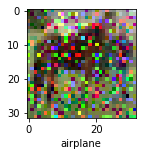

In [492]:
show_image(adv_images[1], 1)

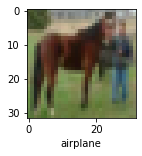

In [493]:
show_image(orig_images[1], 1)